In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV , StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Data\data.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
columns_to_be_removed = ['Education' , 'EmployeeCount' , 'EmployeeNumber' , 'JobInvolvement' , 'MonthlyRate' , 'Over18' , 'PerformanceRating' , 'RelationshipSatisfaction' , 'WorkLifeBalance' , 'TrainingTimesLastYear' , 'StockOptionLevel' , 'StandardHours']

In [6]:
columns_to_be_removed

['Education',
 'EmployeeCount',
 'EmployeeNumber',
 'JobInvolvement',
 'MonthlyRate',
 'Over18',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance',
 'TrainingTimesLastYear',
 'StockOptionLevel',
 'StandardHours']

In [7]:
df.drop(columns= columns_to_be_removed , inplace=True , axis = 1)


In [8]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,2,Female,94,...,Single,5993,8,Yes,11,8,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,3,Male,61,...,Married,5130,1,No,23,10,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,Male,92,...,Single,2090,6,Yes,15,7,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,4,Female,56,...,Married,2909,1,Yes,11,8,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,1,Male,40,...,Married,3468,9,No,12,6,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,Medical,3,Male,41,...,Married,2571,4,No,17,17,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Medical,4,Male,42,...,Married,9991,4,No,15,9,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Life Sciences,2,Male,87,...,Married,6142,1,Yes,20,6,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Medical,4,Male,63,...,Married,5390,2,No,14,17,9,6,0,8


In [9]:
category_columns= list(df.select_dtypes(include = 'object').columns)
category_columns

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [10]:
category_columns

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [11]:
for columns in category_columns:

    print( columns , list(df[columns].unique()))

Attrition ['Yes', 'No']
BusinessTravel ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']
Department ['Sales', 'Research & Development', 'Human Resources']
EducationField ['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']
Gender ['Female', 'Male']
JobRole ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources']
MaritalStatus ['Single', 'Married', 'Divorced']
OverTime ['Yes', 'No']


In [12]:

lbencoder = LabelEncoder()

for column in category_columns:
  
    df[column] = lbencoder.fit_transform(df[column])

    print(lbencoder.classes_)  

lbencoder.classes_ 


['No' 'Yes']
['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


array(['No', 'Yes'], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   Attrition                1470 non-null   int32
 2   BusinessTravel           1470 non-null   int32
 3   DailyRate                1470 non-null   int64
 4   Department               1470 non-null   int32
 5   DistanceFromHome         1470 non-null   int64
 6   EducationField           1470 non-null   int32
 7   EnvironmentSatisfaction  1470 non-null   int64
 8   Gender                   1470 non-null   int32
 9   HourlyRate               1470 non-null   int64
 10  JobLevel                 1470 non-null   int64
 11  JobRole                  1470 non-null   int32
 12  JobSatisfaction          1470 non-null   int64
 13  MaritalStatus            1470 non-null   int32
 14  MonthlyIncome            1470 non-null   int64
 15  NumC

In [14]:
outlier_column = ['Age' , 'JobLevel' , 'MonthlyIncome' , 'NumCompaniesWorked' , 'PercentSalaryHike' , 'TotalWorkingYears', 'YearsAtCompany' , 'YearsInCurrentRole' , 'YearsSinceLastPromotion' , 'YearsWithCurrManager']

In [15]:
outlier_column

['Age',
 'JobLevel',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [16]:
df.shape

(1470, 23)

In [17]:
#Removing Outliers
for column in outlier_column:

    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1

    lower_bound = q1  - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    df = df[(df[column]>=lower_bound) & (df[column]<=upper_bound)]


In [18]:
df.shape

(1070, 23)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1070 non-null   int64
 1   Attrition                1070 non-null   int32
 2   BusinessTravel           1070 non-null   int32
 3   DailyRate                1070 non-null   int64
 4   Department               1070 non-null   int32
 5   DistanceFromHome         1070 non-null   int64
 6   EducationField           1070 non-null   int32
 7   EnvironmentSatisfaction  1070 non-null   int64
 8   Gender                   1070 non-null   int32
 9   HourlyRate               1070 non-null   int64
 10  JobLevel                 1070 non-null   int64
 11  JobRole                  1070 non-null   int32
 12  JobSatisfaction          1070 non-null   int64
 13  MaritalStatus            1070 non-null   int32
 14  MonthlyIncome            1070 non-null   int64
 15  NumCompan

In [49]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,...,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,34.784112,0.173832,1.605607,805.257009,1.264486,9.243925,2.253271,2.723364,0.615888,66.426168,...,1.119626,4849.104673,2.437383,0.278505,15.340187,8.324299,4.970093,3.292523,0.939252,3.151402
std,8.415937,0.379142,0.666986,401.032575,0.531646,8.063205,1.343092,1.096860,0.486612,20.312656,...,0.743345,2789.896866,2.225649,0.448473,3.614513,4.867800,3.507981,2.933858,1.247280,2.820723
min,18.000000,0.000000,0.000000,103.000000,0.000000,1.000000,0.000000,1.000000,0.000000,30.000000,...,0.000000,1009.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,1.000000,468.250000,1.000000,2.000000,1.000000,2.000000,0.000000,49.000000,...,1.000000,2693.250000,1.000000,0.000000,12.000000,5.000000,2.000000,2.000000,0.000000,1.000000
50%,34.000000,0.000000,2.000000,809.000000,1.000000,7.000000,2.000000,3.000000,1.000000,67.000000,...,1.000000,4228.500000,1.000000,0.000000,14.000000,8.000000,5.000000,2.000000,1.000000,2.000000
75%,40.000000,0.000000,2.000000,1162.000000,2.000000,14.000000,3.000000,4.000000,1.000000,84.000000,...,2.000000,6133.500000,4.000000,1.000000,18.000000,10.000000,7.000000,5.000000,1.000000,5.000000
max,60.000000,1.000000,2.000000,1498.000000,2.000000,29.000000,5.000000,4.000000,1.000000,100.000000,...,2.000000,16422.000000,8.000000,1.000000,25.000000,23.000000,18.000000,14.000000,5.000000,11.000000


In [48]:
for column in list(df.columns):

    print( column , "=======" ,  "Min" , df[column].min() , "max" , df[column].max())

Age ======= Min 18 max 60
Attrition ======= Min 0 max 1
BusinessTravel ======= Min 0 max 2
DailyRate ======= Min 103 max 1498
Department ======= Min 0 max 2
DistanceFromHome ======= Min 1 max 29
EducationField ======= Min 0 max 5
EnvironmentSatisfaction ======= Min 1 max 4
Gender ======= Min 0 max 1
HourlyRate ======= Min 30 max 100
JobLevel ======= Min 1 max 4
JobRole ======= Min 0 max 8
JobSatisfaction ======= Min 1 max 4
MaritalStatus ======= Min 0 max 2
MonthlyIncome ======= Min 1009 max 16422
NumCompaniesWorked ======= Min 0 max 8
OverTime ======= Min 0 max 1
PercentSalaryHike ======= Min 11 max 25
TotalWorkingYears ======= Min 0 max 23
YearsAtCompany ======= Min 0 max 18
YearsInCurrentRole ======= Min 0 max 14
YearsSinceLastPromotion ======= Min 0 max 5
YearsWithCurrManager ======= Min 0 max 11


In [20]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,1,2,0,94,...,2,5993,8,1,11,8,6,4,0,5
1,49,0,1,279,1,8,1,3,1,61,...,1,5130,1,0,23,10,10,7,1,7
2,37,1,2,1373,1,2,4,4,1,92,...,2,2090,6,1,15,7,0,0,0,0
3,33,0,1,1392,1,3,1,4,0,56,...,1,2909,1,1,11,8,8,7,3,0
5,32,0,1,1005,1,2,1,4,1,79,...,2,3068,0,0,13,8,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,3,3,1,41,...,1,2571,4,0,17,17,5,2,0,3
1466,39,0,2,613,1,6,3,4,1,42,...,1,9991,4,0,15,9,7,7,1,7
1467,27,0,2,155,1,4,1,2,1,87,...,1,6142,1,1,20,6,6,2,0,3
1468,49,0,1,1023,2,2,3,4,1,63,...,1,5390,2,0,14,17,9,6,0,8


In [21]:
X = df.drop('Attrition' , axis = 1)
y = df['Attrition']


In [22]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X) , columns=X.columns)

In [23]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.3 , random_state=42)

In [24]:
model = LogisticRegression()

In [25]:
X_train 

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
442,-0.093213,0.591582,0.059232,-2.379547,-0.774735,-1.678459,0.252325,0.789729,1.062585,-0.931814,...,-0.161005,-0.398805,-1.095646,-0.621297,1.013006,-0.888763,-0.561866,-0.440760,-0.753393,-0.408385
464,0.382297,0.591582,-1.023480,1.384112,-0.030266,-0.188661,-0.659795,0.789729,1.555119,-0.931814,...,-0.161005,-0.699315,-1.095646,-0.621297,1.013006,-1.094291,-0.847063,-0.440760,0.048727,-0.408385
504,0.144542,0.591582,-0.686692,1.384112,-0.774735,-0.933560,0.252325,0.789729,-0.759791,1.818644,...,-0.161005,1.963677,-0.646129,1.609535,-1.201328,1.577569,3.145702,1.264277,1.652966,1.365040
732,-1.281991,0.591582,1.673322,1.384112,-0.650657,0.556238,1.164444,-1.266257,-1.203072,0.443415,...,-0.161005,-0.246398,-0.646129,1.609535,-0.924536,-0.683235,0.008529,0.241255,-0.753393,-0.053700
388,-0.925358,-0.908401,-1.275448,-0.497718,0.093812,-0.933560,1.164444,0.789729,-1.695606,1.818644,...,-1.506905,1.414296,-0.646129,-0.621297,1.566590,0.138875,1.149319,1.264277,0.048727,1.365040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,-1.995257,-0.908401,1.249218,1.384112,-0.526578,-0.188661,-0.659795,0.789729,0.126770,-0.931814,...,1.184895,-1.065449,-0.646129,1.609535,-0.370953,-1.710874,-1.417458,-1.122775,-0.753393,-1.117755
466,-0.449847,0.591582,1.039661,-0.497718,0.217891,-0.933560,1.164444,0.789729,-0.907552,-0.931814,...,-0.161005,-0.894037,0.252906,1.609535,1.013006,-0.066652,0.293727,0.241255,-0.753393,-0.408385
121,-0.093213,-0.908401,-1.252995,1.384112,-0.898813,-0.188661,0.252325,-1.266257,0.422290,-0.931814,...,-0.161005,-0.938862,1.601458,-0.621297,0.736214,-0.477708,-0.276668,-0.099753,0.048727,-0.408385
1044,-1.400869,-0.908401,-0.417261,1.384112,-0.030266,-0.188661,1.164444,0.789729,-1.646353,-0.931814,...,-0.161005,-1.097007,-0.646129,-0.621297,1.013006,-1.505346,-1.132261,-1.122775,0.048727,-1.117755


In [26]:
y_train

613     0
642     0
693     1
1025    0
537     0
       ..
457     1
644     0
159     0
1438    1
1203    0
Name: Attrition, Length: 749, dtype: int32

In [27]:
model.fit(X_train , y_train)

LogisticRegression()

In [28]:
y_pred = model.predict(X_test)

In [29]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [30]:
accuracy = accuracy_score(y_pred , y_test)

In [31]:
accuracy

0.8566978193146417

<Axes: >

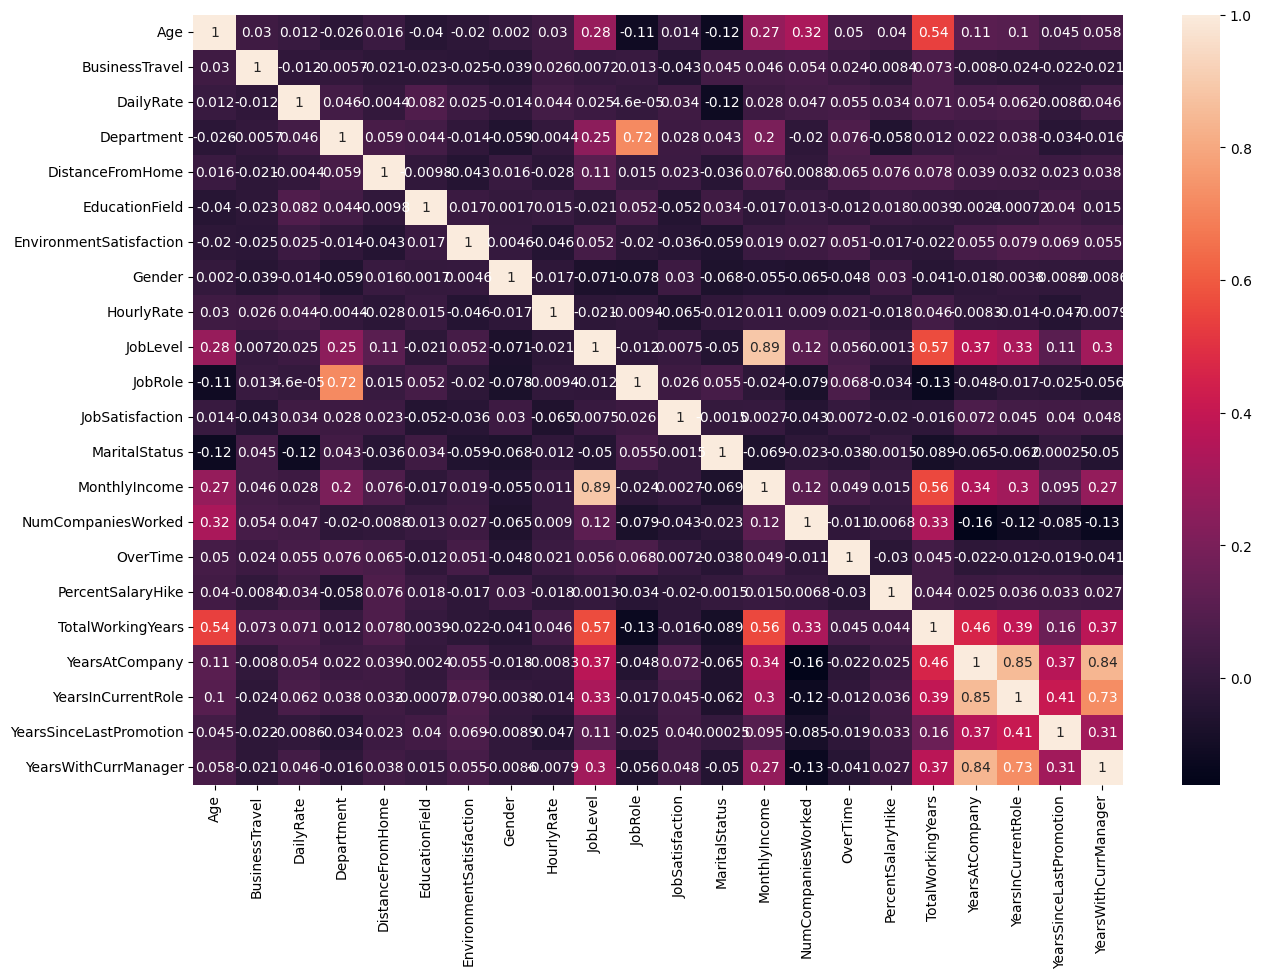

In [32]:
#feature select
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr() , annot = True)

In [33]:
listr = ['JobRole' , 'JobLevel' , 'YearsInCurrentRole' , 'YearsWithCurrManager']

In [34]:
feature_selected_x = X_train.drop(columns=listr , axis = 1)

In [35]:
feature_selected_x_test = X_test.drop(columns=listr , axis =1)


<Axes: >

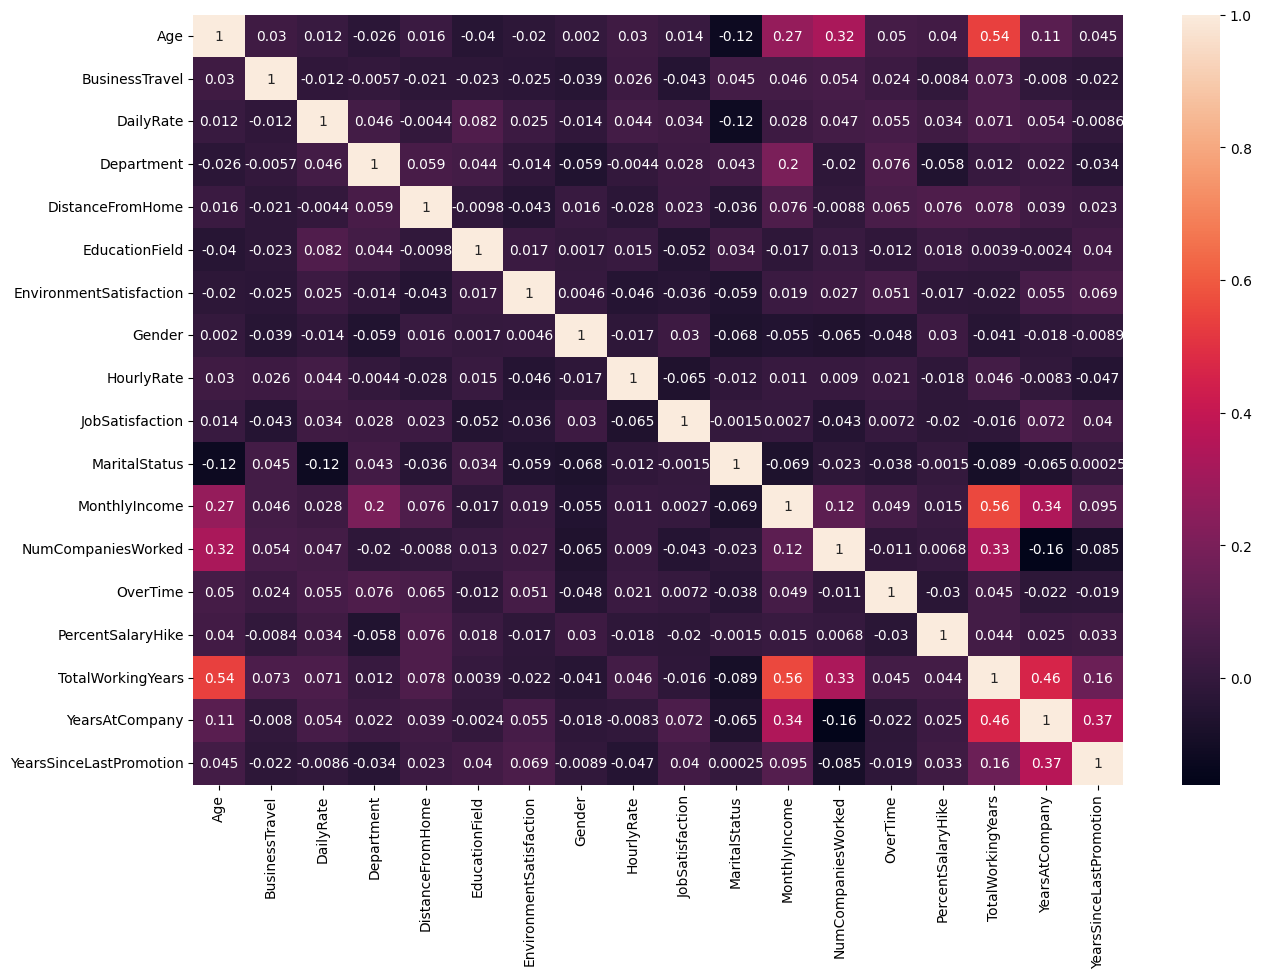

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(feature_selected_x.corr() , annot = True)

In [37]:
model2 = LogisticRegression()

model2.fit(feature_selected_x , y_train)

LogisticRegression()

In [38]:
y_pred2 = model2.predict(feature_selected_x_test)

In [39]:
accuracy_score(y_pred2 , y_test)

0.8473520249221184

In [40]:
filtered_columns = list(feature_selected_x.columns)
filtered_columns

['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsSinceLastPromotion']

# HyperParameter Tuning

In [41]:
param = {
    'penalty' : [ 'l1', 'l2' , 'elasticnet' , None],
    'C' : [1.0 , 0.5 , 0.9 , 0.8 , 0.3],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg' , 'newton-cholesky' , 'sag' , 'saga' ] ,
    'max_iter' : [100 , 500 , 50 , 300  ,1000],
    'l1_ratio' : [0 , 0.3 ,  0.5 , 0.9]
 }

In [42]:
stratifiedInstance = StratifiedKFold(n_splits=5 , shuffle=True , random_state=42)

In [43]:
gscv = GridSearchCV(model2 , param_grid=param , cv= stratifiedInstance)

In [44]:
gscv.fit(feature_selected_x , y_train)

KeyboardInterrupt: 

In [ ]:
gscv.best_estimator_

In [ ]:
model2.set_params(**gscv.best_params_)

In [ ]:
model2.fit(feature_selected_x , y_train)

In [ ]:
ypred3 = model2.predict(feature_selected_x_test)

In [ ]:
accuracy_score(ypred3 , y_test)

In [ ]:
x_test.columns

In [ ]:
import sys
from dataclasses import dataclass
from typing import Any
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , LabelEncoder
from src.exception import CustomException
from src.logger import logging
import os


@dataclass
class DataTransformerConfig:
    preprocessor_obj_file_path = os.path.join('artifacts' , "preprocessor.pkl")

class DataTransformer:
    
    def __init__(self):
        self.data_transformation_config = DataTransformerConfig()

    def get_data_transformer_object(self):

        try:

            
            pass


        except Exception as e:
            raise CustomException(e,sys)
        
    def initiate_data_transformation(self , train_path , test_path):

        try:

            train_df = pd.read_csv(train_path)
            test_df = pd.read_csv(test_path)

            logging.info("Read train and test data set Successfully")

            columns_to_be_removed = ['Education' , 'EmployeeCount' , 'EmployeeNumber' , 'JobInvolvement' , 'MonthlyRate' , 'Over18' , 'PerformanceRating' , 'RelationshipSatisfaction' , 'WorkLifeBalance' , 'TrainingTimesLastYear' , 'StockOptionLevel' , 'StandardHours']

            train_df.drop(columns= columns_to_be_removed , inplace=True , axis = 1)
            test_df.drop(columns= columns_to_be_removed , inplace=True , axis = 1) 

            outlier_column = ['Age' , 'JobLevel' , 'MonthlyIncome' , 'NumCompaniesWorked' , 'PercentSalaryHike' , 'TotalWorkingYears', 'YearsAtCompany' , 'YearsInCurrentRole' , 'YearsSinceLastPromotion' , 'YearsWithCurrManager']

            logging.info("Removing Outliers for train set")
            for column in outlier_column:

                q1 = train_df[column].quantile(0.25)
                q3 = train_df[column].quantile(0.75)
                IQR = q3 - q1

                lower_bound = q1  - 1.5 * IQR
                upper_bound = q3 + 1.5 * IQR

                train_df = train_df[(train_df[column]>=lower_bound) & (train_df[column]<=upper_bound)]

            logging.info("Removing Outliers for test set")
            for column in outlier_column:

                q1 = test_df[column].quantile(0.25)
                q3 = test_df[column].quantile(0.75)
                IQR = q3 - q1

                lower_bound = q1  - 1.5 * IQR
                upper_bound = q3 + 1.5 * IQR

                test_df = test_df[(test_df[column]>=lower_bound) & (test_df[column]<=upper_bound)]


            logging.info("Outliers Removed Successfully ")

            category_columns= list(train_df.select_dtypes(include = 'object').columns)

            



            preprocessor = ColumnTransformer( 
                [ ("")]
            )  






        except Exception as e:
            raise CustomException(e,sys)





In [ ]:
scaler = StandardScaler()
labelencoder = LabelEncoder() 

preprocessor = ColumnTransformer(
    transformers=[
        ("labelencoder" , labelencoder , category_columns),
        ("scaler" , scaler , df.columns)
    ]
)

            

In [ ]:
df[df[column]]

KeyError: "None of [Index([5, 7, 0, 0, 6, 0, 0, 8, 3, 8,\n       ...\n       3, 4, 0, 7, 0, 3, 7, 3, 8, 2],\n      dtype='int64', length=1070)] are in the [columns]"